<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/12_Series_Tiempo_Cap10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 2. Pronósticos con modelos estadísticos**

# **10. Pronóstico de múltiples series temporales - El modelo de autorregresión vectorial, VAR(p)**
### **Este capítulo cubre**
+ Examen del modelo VAR
+ Exploración de la causalidad de Granger para validar el uso
del modelo VAR
+ Pronóstico de múltiples series temporales utilizando el modelo
VAR

## **Introducción**
+ En el capítulo anterior, vio cómo se puede utilizar el modelo **SARIMAX** para incluir el impacto de las variables exógenas en una serie temporal.
+ Con el modelo **SARIMAX**, la relación es unidireccional: suponemos que la variable exógena tiene un impacto solo en el objetivo.
+ Sin embargo, es posible que dos series temporales tengan una relación bidireccional, lo que significa que la serie temporal *t1* es un predictor de la serie temporal *t2*, y la serie temporal *t2* también es un predictor de la serie temporal *t1*.
+ En tal caso, sería útil tener un modelo que pueda tener en cuenta esta relación bidireccional y generar predicciones para ambas series temporales simultáneamente.

+ **Esto nos lleva al modelo de autorregresión vectorial (VAR).**
+ Este modelo en particular *nos permite capturar la relación entre múltiples series temporales a medida que cambian con el tiempo*.
+ Eso, a su vez, *nos permite producir pronósticos para muchas series temporales simultáneamente, lo que permite realizar pronósticos multivariados.*
+ A lo largo de este capítulo, utilizaremos el mismo conjunto de datos macroeconómicos de EE. UU. que en el capítulo 9.
+ Esta vez, exploraremos la relación entre el ingreso real disponible y el consumo real, como se muestra en la figura 10.1.

### **Ejemplo ilustrativo del Capitulo 10**
+ **Como ejemplo orientativo, utilizaremos un conjunto de datos macroeconómicos de los Estados Unidos, recopilados trimestralmente entre 1959 y 2009, para pronosticar el producto interno bruto (PIB) real, como se muestra en la figura 9.1.**

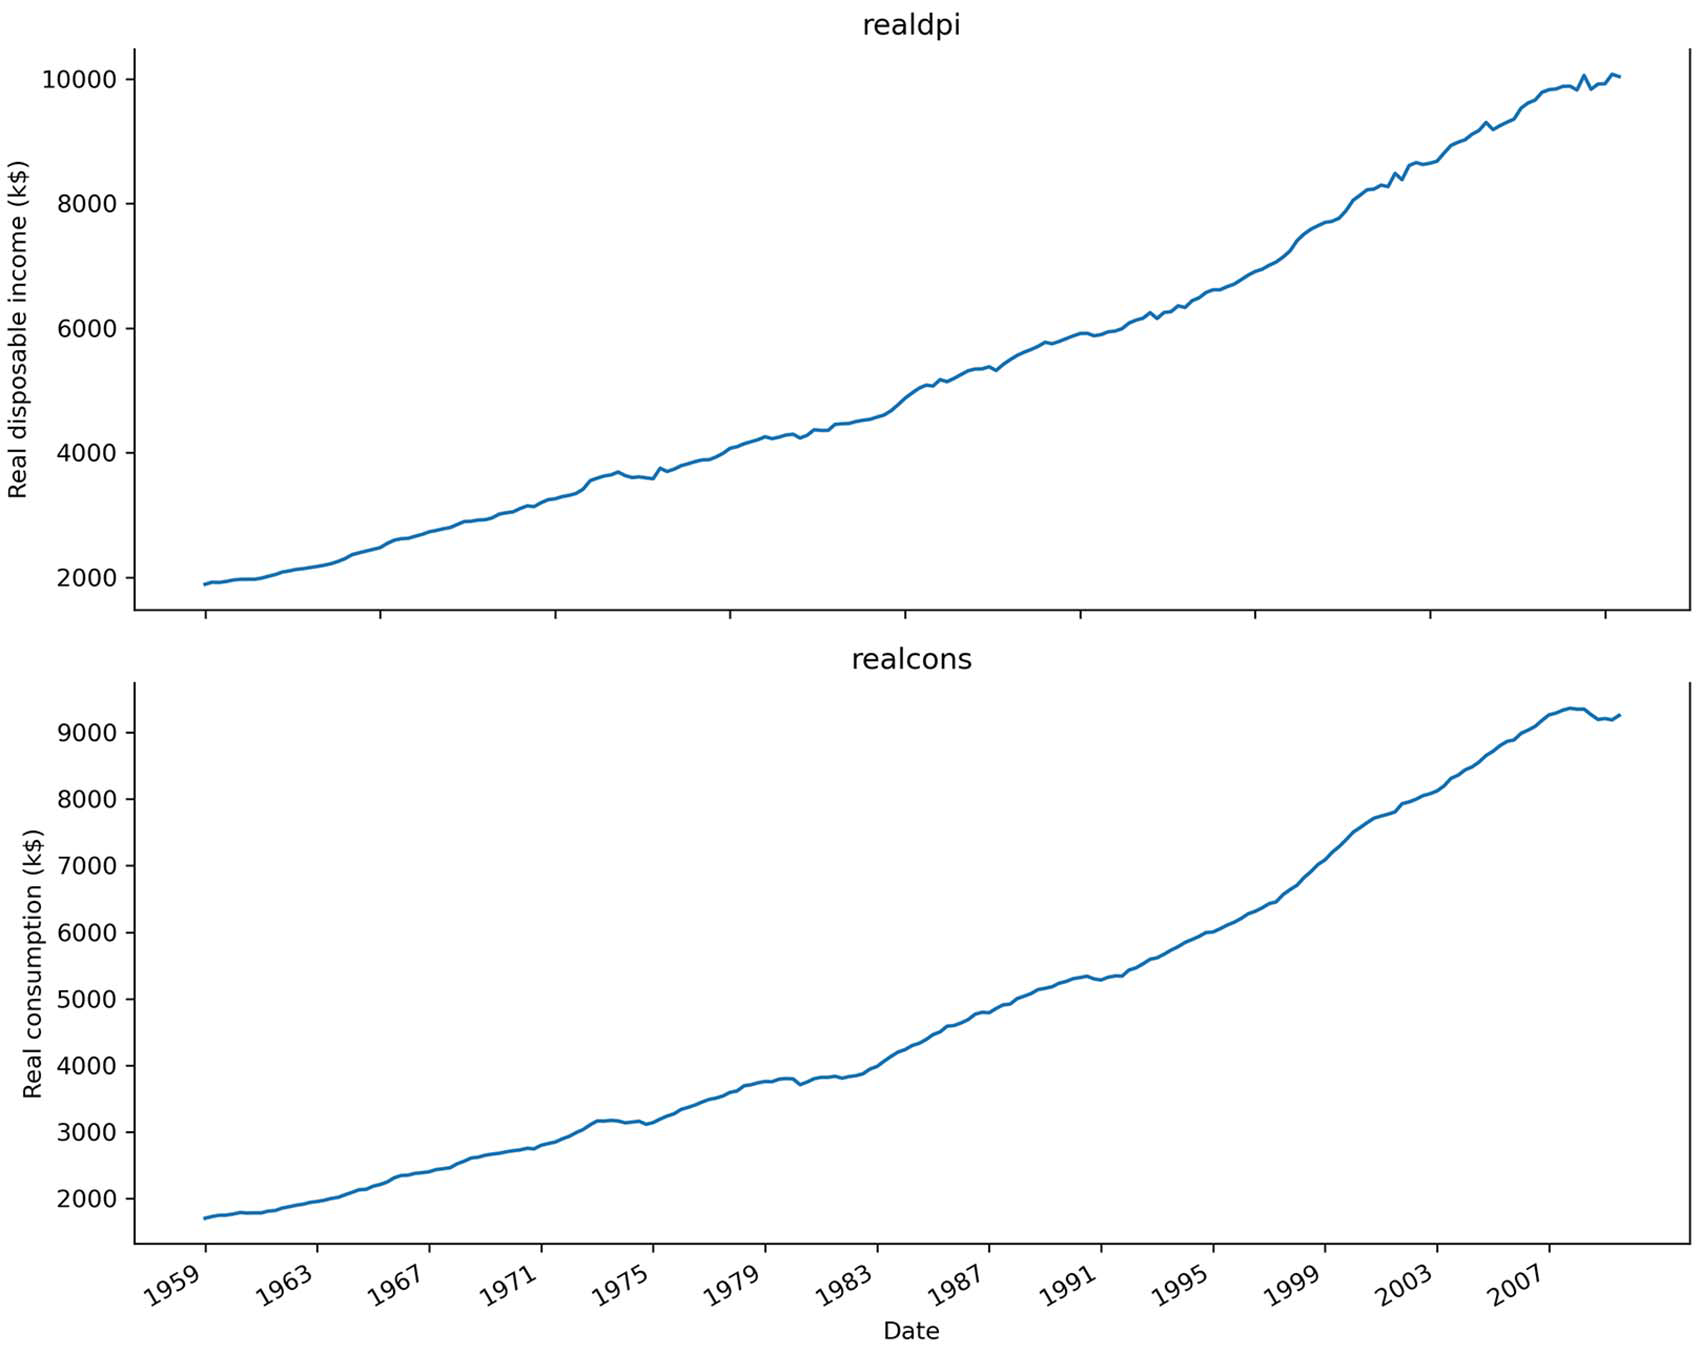

+ **Figura 10.1 Ingreso disponible real (realdpi) y consumo real (realcons) en Estados Unidos de 1959 a 2009. Los datos se recopilan trimestralmente y se expresan en miles de dólares estadounidenses. Ambas series tienen una forma y una tendencia similares a lo largo del tiempo.**


### **Lo que capta el modelo VAR**
+ El consumo real expresa cuánto dinero gasta la gente, mientras que el ingreso disponible real representa cuánto dinero está disponible para gastar.
+ Por lo tanto, es una hipótesis razonable que una mayor cantidad de ingreso disponible podría indicar un mayor consumo.
+ Lo opuesto también puede ser cierto, que un mayor consumo signifique que hay más ingresos disponibles para gastar.
+ **Esta relación bidireccional puede ser capturada por un modelo VAR.**
+ En este capítulo, primero exploraremos el modelo VAR en detalle.
+ Luego, presentaremos la **prueba de causalidad de Granger**, que nos ayudará a validar la hipótesis de que dos series temporales tienen un impacto mutuo.
+ Finalmente, aplicaremos el modelo VAR para producir pronósticos tanto para el consumo real como para el ingreso disponible real.

# **10.1 Análisis del modelo VAR**
+ **El modelo de autorregresión vectorial (VAR)** *captura la relación entre múltiples series a medida que cambian con el tiempo*.
+ En este modelo, *cada serie tiene un impacto en la otra*, a diferencia del modelo SARIMAX, *donde la variable exógena tenía un impacto en el objetivo*, pero no al revés.
+ Recuerde que en el capítulo 9 usamos las variables *realcons,
realinv, realgovt, realdpi, cpi, m1 y tbilrate* como predictores del PIB real, pero no consideramos cómo el PIB real puede afectar a cualquiera de esas variables.
+ **Por eso usamos el modelo SARIMAX en ese caso**.
+ Es posible que haya notado el regreso de la autorregresión, lo que nos lleva de nuevo al **modelo AR(p)** del capítulo 5.
+ Esta es una buena intuición, ya que el *modelo VAR puede verse como una generalización del modelo AR(p)* para permitir el pronóstico de múltiples series de tiempo.
+ Por lo tanto, también podemos denotar el modelo VAR como *VAR(p)*, donde *p* es el orden y tiene el mismo significado que en el *modelo AR(p)*.
+ Recordemos que *AR(p)* expresa el valor de una serie temporal como una combinación lineal de una constante *C*, el término de error actual $ϵ_t$, que también es ruido blanco, y los valores pasados ​​de la serie $y_{t –p}$.
+ La magnitud de la influencia de los valores pasados ​​sobre el valor actual se denota como $φ_p$, que representa los coeficientes del modelo $AR(p)$, como se muestra en la ecuación 10.1.

+ **Ecuación 10.1 - Modelo AR(p)**

$$y_t = C + φ_1*y_{t –1} + φ_2*y_{t –2} +⋅⋅⋅+ φ_p*y_{t–p} + ϵ_t$$

+ Podemos simplemente extender la ecuación 10.1 para permitir que se modelen múltiples series temporales, donde cada una tiene un impacto en las otras.
+ Para simplificar, consideremos un sistema con dos series temporales, denotadas como $y_{1,t}$ e $y_{2,t}$, y un orden de $1$, lo que significa que $p = 1$.
+ Luego, utilizando la notación matricial, el modelo $VAR(1)$ se puede expresar como la ecuación 10.2.
+ **Ecuación 10.2**

$$
\left(\begin{array}{c}
y_{1,t} \\
y_{2,t}
\end{array}\right) = \left(\begin{array}{c}
C_{1} \\
C_{2}
\end{array}\right) + \left(\begin{array}{cc}
\phi_{1,1} & \phi_{1,2}\\
\phi_{2,1} & \phi_{2,2}
\end{array}\right)
\left(\begin{array}{c}
y_{1,t-1} \\
y_{2,t-1}
\end{array}\right) + \left(\begin{array}{c}
\epsilon_{1,t} \\
\epsilon_{2,t}
\end{array}\right)
$$

+ Al realizar la multiplicación de matrices, la expresión matemática para $y1,t se muestra en la ecuación 10.3, y la de y2,t se muestra en la ecuación 10.4.

+ **Ecuación 10.3 - Modelo AR(p) para $y_{1,t}$**

$$y_{1,t} = C_1 + φ_{1,1}*y_{1,t –1} + φ_{1,2}*y_{2,t –1} + ϵ_{1,t}$$

+ **Ecuación 10.4 - Modelo AR(p) para $y_{2,t}$**

$$y_{2,t} = C_2 + φ_{2,1}*y_{1,t –2} + φ_{2,2}*y_{2,t –2} + ϵ_{2,t}$$

+ En la ecuación 10.3, notará que la expresión para $y_{1,t}$ incluye el valor pasado de $y_{2,t}$.
+ De manera similar, en la ecuación 10.4, la expresión para $y_{2,t}$ incluye el valor pasado de $y_{1,t}$.
+ Por lo tanto, puede ver cómo el **modelo VAR** captura el impacto de cada serie sobre la otra.
+ Podemos extender la ecuación 10.3 para expresar un **modelo VAR(p) general** que considera *p* valores rezagados, lo que da como resultado la ecuación 10.5.
+ Observe que el superíndice no representa un exponente, sino que se utiliza para indexar.
+ Para simplificar, nuevamente consideraremos solo dos series de tiempo.
+ **Ecuación 10.5**

$$
\left(\begin{array}{c}
y_{1,t} \\
y_{2,t}
\end{array}\right) = \left(\begin{array}{c}
C_{1} \\
C_{2}
\end{array}\right) + \left(\begin{array}{cc}
\phi_{1,1}^{1} & \phi_{1,2}^{1}\\
\phi_{2,1}^{1} & \phi_{2,2}^{1}
\end{array}\right)
\left(\begin{array}{c}
y_{1,t-1} \\
y_{2,t-1}
\end{array}\right) + \left(\begin{array}{cc}
\phi_{1,1}^{2} & \phi_{1,2}^{2}\\
\phi_{2,1}^{2} & \phi_{2,2}^{2}
\end{array}\right)
\left(\begin{array}{c}
y_{1,t-2} \\
y_{2,t-2}
\end{array}\right) + ... + \left(\begin{array}{cc}
\phi_{1,1}^{p} & \phi_{1,2}^{p}\\
\phi_{2,1}^{p} & \phi_{2,2}^{p}
\end{array}\right)
\left(\begin{array}{c}
y_{1,t-p} \\
y_{2,t-p}
\end{array}\right) + \left(\begin{array}{c}
\epsilon_{1,t} \\
\epsilon_{2,t}
\end{array}\right)
$$

+ **Al igual que con el modelo AR(p), el modelo VAR(p) requiere que cada serie de tiempo sea estacionaria**

### **Mas del modelo $VAR(p)$**
+ Has visto cómo se expresa matemáticamente el modelo VAR(p), con sus valores rezagados incluidos en cada expresión, como se muestra en las ecuaciones 10.3 y 10.4.
+ Esto debería darte una idea de cómo cada serie tiene un impacto en las demás.
+ El modelo VAR(p) solo es válido si ambas series son útiles para predecirse entre sí.
+ Observar la forma general de la serie a lo largo del tiempo no es suficiente para sustentar esa hipótesis.
+ En cambio, debemos aplicar la **prueba de causalidad de Granger**, que es una prueba de hipótesis estadística para determinar si una serie temporal es predictiva de otra.
+ Solo si esta prueba es exitosa podemos aplicar el modelo VAR para hacer predicciones.
+ Este es un paso importante en nuestro procedimiento de modelado cuando utilizamos un modelo VAR.

# **10.2. Diseño de un procedimiento de modelado para el modelo VAR(p)**

+ El modelo VAR(p) requiere una versión ligeramente modificada del procedimiento de modelado que hemos estado utilizando.
+ *La modificación más notable es la adición de la prueba de causalidad de Granger, ya que el modelo VAR supone que los valores pasados ​​de ambas series de tiempo son significativamente predictivos de la otra serie de tiempo*.
+ El procedimiento de modelado completo para el modelo VAR(p) se muestra en la figura 10.2.
+ Como puede ver, el procedimiento de modelado para el modelo VAR(p) es muy similar a los procedimientos de modelado que hemos estado utilizando desde la introducción del modelo ARMA(p,q)*.
+ La ​​principal diferencia aquí es que enumeramos valores solo para el orden *p*, ya que estamos ajustando *diferentes modelos VAR(p)* a los datos.
+ **Luego, una vez que se ha seleccionado el modelo con el AIC más bajo, realizamos la prueba de causalidad de Granger**.
+ Esta prueba determina si los valores pasados ​​de una serie de tiempo son estadísticamente significativos para pronosticar otra serie de tiempo.
+ Es importante comprobar esta relación porque el modelo VAR(p) utiliza valores pasados ​​de una serie temporal para pronosticar otra.
+ Si la prueba de *causalidad de Granger* falla, no podemos decir que los valores pasados ​​de una serie temporal predicen la otra serie temporal.
+ En ese caso, el modelo VAR(p) deja de ser válido y debemos volver a utilizar una variación del modelo SARIMAX para pronosticar la serie temporal.
+ **Por otro lado, si la prueba de causalidad de Granger pasa, podemos reanudar el procedimiento con el análisis de residuos. Como antes, si los residuos están cerca del ruido blanco, podemos utilizar el modelo VAR(p) seleccionado para realizar pronósticos.**
+ Antes de continuar con la aplicación de este procedimiento de modelado, vale la pena dedicar un tiempo a explorar la prueba de causalidad de Granger con más detalle.

## **10.2.1. Exploración de la prueba de causalidad de Granger**
+ Como se mostró en la sección anterior, el modelo VAR(p) supone que cada serie temporal tiene un impacto en otra.
+ Por lo tanto, es importante comprobar si esta relación realmente existe.
+ De lo contrario, estaríamos suponiendo una relación que no existe, lo que
introduciría errores en el modelo y haría que nuestras predicciones fueran inválidas y poco fiables.
+ Por lo tanto, utilizamos la prueba de causalidad de Granger.
+ Esta es una prueba estadística que nos ayuda a determinar si los valores pasados ​​de una serie temporal $y_{2,t}$ pueden ayudar a pronosticar la serie temporal $y_{1,t}$.
+ Si ese es el caso, entonces decimos que $y_{2,t}$ causa $y_{1,t}$ en el sentido de Granger.
+ Tenga en cuenta que la prueba de causalidad de Granger se limita a la causalidad predictiva, ya que solo estamos determinando si los valores pasados ​​de una serie temporal son estadísticamente significativos para predecir otra serie temporal.

+ Además, la prueba requiere que ambas series temporales sean estacionarias para que los resultados sean válidos.
+ Además, la prueba de causalidad de Granger prueba la causalidad solo en una dirección; debemos repetir la prueba para verificar que $y_{1,t}$ también causa Granger a $y_{2,t}$ para que el modelo VAR sea válido.
+ De lo contrario, debemos recurrir al modelo SARIMAX y predecir cada serie temporal por separado.
+ La **hipótesis nula** para esta prueba establece que $y_{2,t}$ no causa Granger a $y_{1,t}$.
+ Nuevamente, usaremos el **valor p** con un valor crítico de 0.05 para determinar si rechazamos la hipótesis nula o no.
+ ***En el caso en que el valor p devuelto de la prueba de causalidad de Granger sea menor que 0.05, podemos rechazar la hipótesis nula y decir que $y_{2,t}$ causa Granger $y_{1,t}$***.
+ Viste que *la prueba de causalidad de Granger se realiza después de seleccionar el modelo VAR(p)*.
+ Esto se debe a que la prueba requiere que especifiquemos la cantidad de rezagos que se incluirán en la prueba, lo que es equivalente al orden del modelo.
+ ***Por ejemplo, si el modelo VAR(p) seleccionado es de orden 3, la prueba de causalidad de Granger determinará si los últimos tres valores de una serie temporal son estadísticamente significativos para pronosticar las otras series temporales***.
+ La biblioteca `statsmodels` incluye convenientemente la prueba de causalidad de Granger, que aplicaremos en la siguiente sección cuando pronostiquemos tanto el consumo real como el ingreso disponible real.

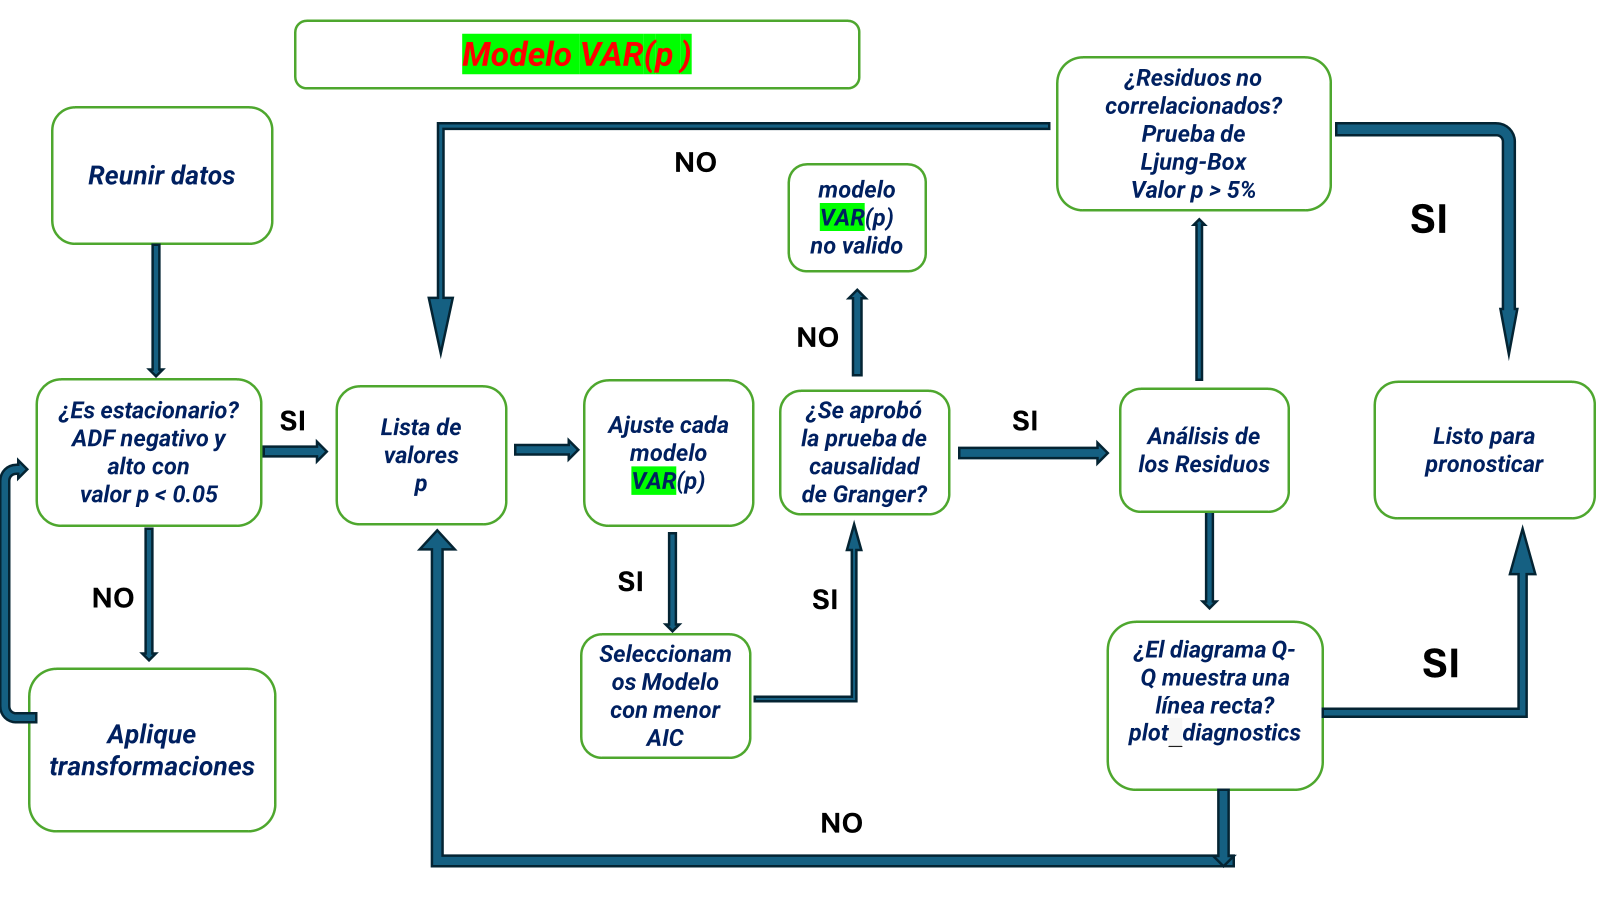

+ **Figura 10.2. Procedimiento de modelado para el modelo VAR(p). Es muy similar a los procedimientos de modelado que hemos estado utilizando desde la introducción del modelo ARMA(p,q), pero esta vez estamos ajustando diferentes modelos VAR(p) y seleccionando el que tenga el AIC más bajo. Luego ejecutamos la prueba de causalidad de Granger. Si falla, el
modelo VAR(p) no es válido y no seguiremos con el procedimiento. Por otro lado, si la prueba pasa, realizamos un análisis de residuos.
Si los residuos son similares al ruido blanco, el modelo VAR(p) se puede utilizar para pronosticar**

# **10.3. Ejemplo ilustrativo -  Pronóstico del ingreso disponible real y del consumo real**
+ Después de examinar el modelo VAR(p) y diseñar un procedimiento de modelado para él, ahora estamos listos para aplicarlo para pronosticar tanto el ingreso disponible real como el consumo real en los Estados Unidos. Usaremos el mismo conjunto de datos que en el capítulo anterior,
que contiene los datos macroeconómicos entre 1959 y 2009.

#### **Paso 1. Las librerias de necesarias**

In [ ]:
#### **Paso 1. Las librerias de necesarias**
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import sklearn.metrics

In [ ]:
# hacer que los graficos se vean bonitos
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# Ignorar advertencias innecesarias
import warnings
warnings.filterwarnings('ignore')

## **Paso 2. Importando los datos**
+ Carguemos el conjunto de datos de macroeconomía de EE. UU. y exploremos las diferentes variables exógenas disponibles para pronosticar el PIB real.
+ Este conjunto de datos está disponible con la biblioteca statsmodels, lo que significa que no necesita descargar y leer un archivo externo.

In [ ]:
## **Paso 2. Importando los datos**
import pandas as pd
# cargar el conjunto de datos macroeconómicos de EE.UU.
df = sm.datasets.macrodata.load_pandas().data

df # Muestra las primeras cinco filas de datos.


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
print(len(df))

203


### **Paso 3. Dibuje nuestra variable para el modelo Var(p)**

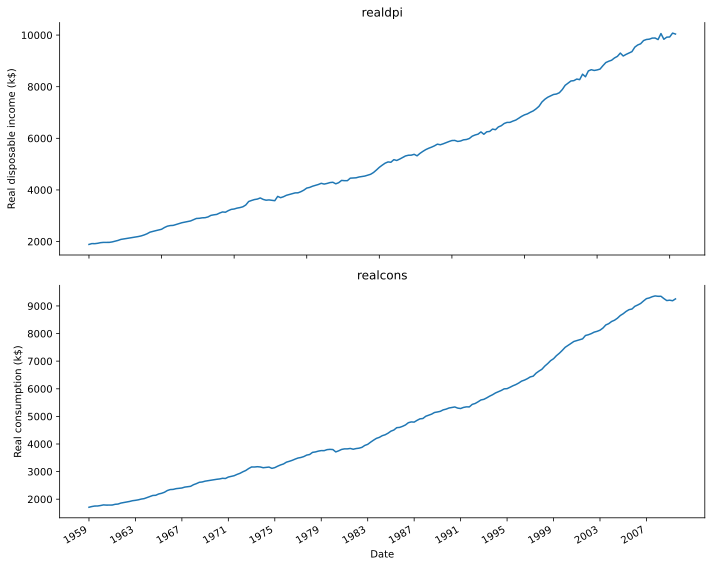

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

ax1.plot(df.realdpi)
ax1.set_xlabel('Date')
ax1.set_ylabel('Real disposable income (k$)')
ax1.set_title('realdpi')
ax1.spines['top'].set_alpha(0)

ax2.plot(df.realcons)
ax2.set_xlabel('Date')
ax2.set_ylabel('Real consumption (k$)')
ax2.set_title('realcons')
ax2.spines['top'].set_alpha(0)

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 10.3 Ingreso disponible real y consumo real en Estados Unidos entre 1959 y 2009. Los datos se recogieron trimestralmente y están expresados ​​en miles de dólares estadounidenses. Se puede observar que ambas curvas tienen una forma similar a lo largo del tiempo.**

### **intuitivamente las convierte en buenas candidatas para un modelo VAR(p)**

+ En la figura 10.3 se puede ver que ambas curvas tienen una forma muy similar a lo largo del tiempo, lo que intuitivamente las convierte en buenas candidatas para un modelo VAR(p).
+ *Es razonable pensar que con un mayor ingreso disponible, es probable que el consumo sea alto, así como un mayor consumo puede ser un signo de un mayor ingreso disponible.*
+ Por supuesto, esta hipótesis tendrá que ser probada utilizando la prueba de causalidad de Granger más adelante en el procedimiento de modelado.
+ Hemos reunido los datos, por lo que ahora debemos determinar si las series temporales son estacionarias.
+ En la figura 10.3, ambas muestran una tendencia positiva a lo largo del tiempo, lo que significa que no son estacionarias. No obstante, aplicaremos la prueba Dickey-Fuller aumentada (ADF) para asegurarnos.

#### **Paso 4. Prueba de Estacionariedad para la serie 1 - Ejecute la prueba ADF y verifique si el proceso original es estacionario. Si no lo es, aplique la diferenciación.**

In [ ]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### **a. Prueba de estacionariedad para la Serie 1 - original - Ingresos Reales**

In [ ]:
### **a. Prueba de estacionariedad para la Serie 1 - original**
from statsmodels.tsa.stattools import adfuller
ADF_result_Serie_1 = adfuller(df.realdpi)

print(f'ADF Statistic: {ADF_result_Serie_1[0]}')
print(f'p-value: {ADF_result_Serie_1[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF_Serie_1 = {ADF_result_Serie_1[0]} es negativo y')
print(f'Si valor p ={round(ADF_result_Serie_1[1],4)} es menor a 0.05')

ADF Statistic: 2.986025351954683
p-value: 1.0
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF_Serie_1 = 2.986025351954683 es negativo y
Si valor p =1.0 es menor a 0.05


### **b. Prueba de estacionariedad para la Serie 2 - original - Consumo Real**

In [ ]:
### **b. Prueba de estacionariedad para la Serie 2 - original - Consumo Real**
from statsmodels.tsa.stattools import adfuller
ADF_result_Serie_2 = adfuller(df.realcons)

print(f'ADF Statistic: {ADF_result_Serie_2[0]}')
print(f'p-value: {ADF_result_Serie_2[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF_Serie_2 = {ADF_result_Serie_2[0]} es negativo y')
print(f'Si valor p ={round(ADF_result_Serie_2[1],4)} es menor a 0.05')

ADF Statistic: 1.549912338050964
p-value: 0.9976992503412904
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF_Serie_2 = 1.549912338050964 es negativo y
Si valor p =0.9977 es menor a 0.05


## **Acerca del Paso 4**
+ Para ambas variables, la prueba ADF arroja un valor p de 1,0.
+ Por lo tanto, no podemos rechazar la hipótesis nula y concluimos que ambas series temporales no son estacionarias, como se esperaba.
+ Aplicaremos una transformación para hacerlas estacionarias.
+ En concreto, diferenciaremos ambas series y comprobaremos su estacionariedad de nuevo.

#### **Paso 5. Ejecute la prueba ADF y verifique si el proceso diefenciado es estacionario. Si no lo es, aplique vuelva a diferenciar.**

#### **Diferenciación de primer orden $d=1$**


### **a. Prueba de estacionariedad para la Serie_1 diferenciada**

In [ ]:
### **Nuestra nueva serie a estudiar sera la diferenciada**
realgdp_diff = np.diff(df.realdpi, n = 1)

### **a. Prueba de estacionariedad para la Serie_1 diferenciada**
from statsmodels.tsa.stattools import adfuller
ADF_diff_Serie_1 = adfuller(realgdp_diff)

print(f'ADF Statistic: {ADF_diff_Serie_1[0]}')
print(f'p-value: {ADF_diff_Serie_1[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF_diff_Serie_1 = {ADF_diff_Serie_1[0]} es negativo y')
print(f'Si valor p ={round(ADF_diff_Serie_1[1],4)} es menor a 0.05')

ADF Statistic: -8.864893340673007
p-value: 1.4493606159108096e-14
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF_diff_Serie_1 = -8.864893340673007 es negativo y
Si valor p =0.0 es menor a 0.05



### **b. Prueba de estacionariedad para la Serie_2 diferenciada**

In [ ]:
### **Nuestra nueva serie a estudiar sera la diferenciada**
realgdp_diff = np.diff(df.realcons, n = 1)

### **b. Prueba de estacionariedad para la Serie_2 diferenciada**
from statsmodels.tsa.stattools import adfuller
ADF_diff_Serie_2 = adfuller(realgdp_diff)

print(f'ADF Statistic: {ADF_diff_Serie_2[0]}')
print(f'p-value: {ADF_diff_Serie_2[1]}')
print(f'¿Cuando se rechaza la Hipótesis Nula?')
print(f'Se rechaza si ocurren:')
print(f'ADF_diff_Serie_2 = {ADF_diff_Serie_2[0]} es negativo y')
print(f'Si valor p ={round(ADF_diff_Serie_2[1],4)} es menor a 0.05')

ADF Statistic: -4.204306080845247
p-value: 0.0006479282158627571
¿Cuando se rechaza la Hipótesis Nula?
Se rechaza si ocurren:
ADF_diff_Serie_2 = -4.204306080845247 es negativo y
Si valor p =0.0006 es menor a 0.05


### **Acerca del Paso 5 y la Diferenciación de segundo orden $d=1$**
+ Para ambas Series diferenciadas, la prueba ADF arroja un valor p < 5%.
+ Por lo tanto, SI podemos rechazar la hipótesis nula y concluimos que ambas series temporales diferenciadas son estacionarias
+ Como se mencionó anteriormente, el modelo VAR(p) requiere que la serie temporal sea estacionaria.
+ Por lo tanto, podemos usar la serie transformada para modelar y necesitaremos integrar los pronósticos para devolverlos a sus escalas originales.

# ** Pronósticosutilizando el modelo VAR(P)**
+ Ahora estamos en el paso de ajustar muchos modelos VAR(p) para seleccionar el que tenga el criterio de información de Akaike (AIC) más pequeño.
+ Escribiremos una función, optimized_VAR, para ajustar muchos modelos VAR(p) mientras variamos el orden p.
+ Esta función devolverá un DataFrame ordenado en orden ascendente de AIC. Esta función se muestra en la siguiente lista.

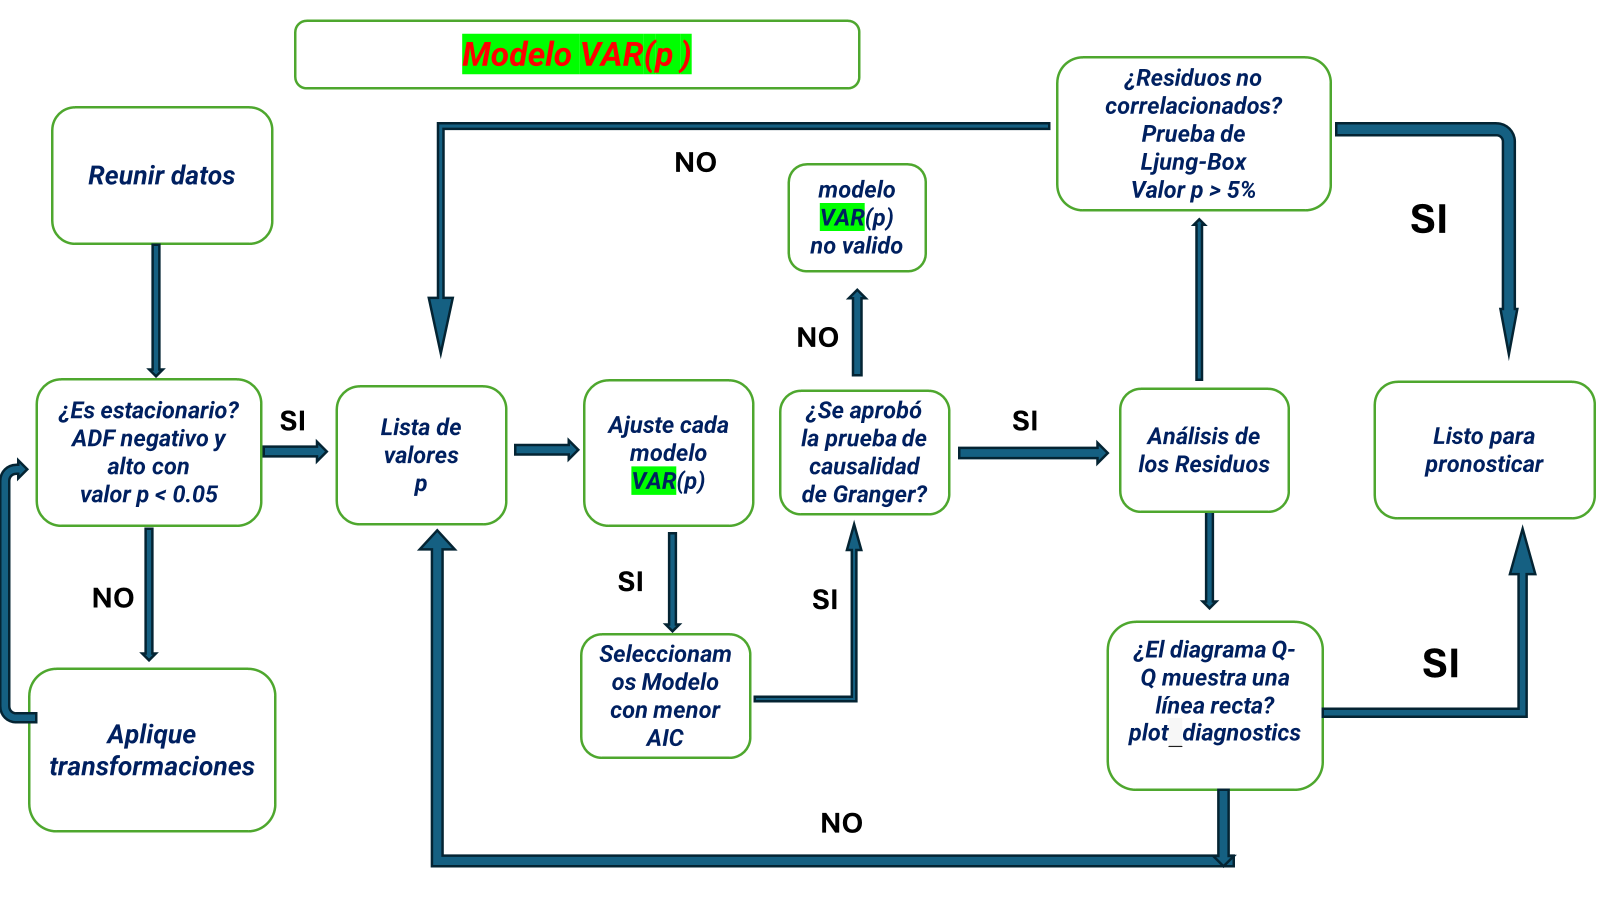

### **Paso 6. Función para ajustar muchos modelos VAR(p) y seleccionar el que tenga el AIC más bajo**
+ **Ahora podemos usar esta función para seleccionar el orden p que minimiza el AIC.**

In [ ]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.varmax import VARMAX

def optimize_VAR(endog: Union[pd.Series, list]) -> pd.DataFrame:

    results = []

    for i in tqdm_notebook(range(15)):
        try:
            model = VARMAX(endog, order=(i, 0)).fit(dips=False)
        except:
            continue

        aic = model.aic
        results.append([i, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['p', 'AIC']

    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

### **Paso 7. Implementando SARIMAX - Ajustamos todos los modelos SARIMAX y calculamos el AIC**
+ Definir los conjuntos de entrenamiento y prueba.
+ En este caso, usaremos el 80 % de los datos para el entrenamiento y el 20 % para las pruebas.
+ Esto significa que los últimos 40 puntos de datos se usarán para las pruebas y el resto para el entrenamiento.
+ Recuerde que el modelo VAR(p) requiere que ambas series sean estacionarias.
+ Por lo tanto, dividiremos el conjunto de datos diferenciados y alimentaremos el conjunto de entrenamiento diferenciado a la función optimized_VAR.

### **a. Funcion objetivo y variables endógenas para aplicar $VAR(p)$ con el AIC**
+ Seleccione solo realdpi y realcons, ya que son las únicas dos variables de interés en este caso.
+ Se diferencian ambas series, ya que la prueba ADF muestra que una diferenciación de primer orden las hace estacionarias.

In [ ]:
# **a. Funcion objetivo y variables endógenas para aplicar $VAR(p)$ con el AIC**
endog = df[['realdpi', 'realcons']] # las series originales

endog_diff = df[['realdpi', 'realcons']].diff()[1:] # Las series diferenciadas

###. **b. Conjunto de entenamiento para evaluar el modelo VAR(p) con el AIC**
+ Los primeros 162 puntos de datos se utilizan para el entrenamiento. Esto representa aproximadamente el 80 % del conjunto de datos.
+ Los últimos 40 puntos de datos corresponden al conjunto de prueba.
+ Esto representa aproximadamente el 20 % del conjunto de datos.

In [ ]:
###. **b. Conjunto de entenamiento para evaluar el modelo con el AIC**
train = endog_diff[:162]
test = endog_diff[162:]

### **c. Obteniendo los modelos VAR(p) y el AIC**
+ Ejecute la función optimized_VAR utilizando los datos diferenciados almacenados en train. Esto es necesario para el modelo VAR(p).

In [ ]:
### **e. Obteniendo los modelos VAR(p) y el AIC**
result_df = optimize_VAR(train)
result_df

  0%|          | 0/15 [00:00<?, ?it/s]

,p,AIC
0,3,3123.070078
1,5,3123.708523
2,6,3126.855598
3,4,3129.194047
4,2,3130.091668
5,7,3133.398275
6,1,3134.333343
7,8,3137.149013
8,9,3140.367180
9,10,3147.838722


#### **d. Evaluamos todos los modelos $VAR(p)$ con el AIC**

+ Al ejecutar la función se obtiene un DataFrame en el que se observa que $p = 3$ tiene el valor AIC más bajo de todos.
+ Por lo tanto, el modelo seleccionado es un modelo $VAR(3)$, *lo que significa que los últimos tres valores de cada serie temporal se utilizan para pronosticar las otras series temporales*.

### **Paso 8. la prueba de causalidad de Granger**
+ Siguiendo el procedimiento de modelado, ahora debemos utilizar la prueba de causalidad de Granger.
+ Recordemos que el modelo VAR supone que los valores pasados ​​de *realcons* son útiles para predecir *realdpi* y que los valores pasados ​​de *realdpi* son útiles para predecir *realcons*.
+ Esta relación debe probarse.
+ ***Si la prueba de causalidad de Granger devuelve un valor p mayor que 0,05, no podemos rechazar la hipótesis nula, lo que significa que las variables no se causan entre sí en el sentido de Granger y el modelo no es válido.***
+ ***Por otro lado, un valor p menor que 0,05 nos permitirá rechazar la hipótesis nula, validando así el modelo VAR(3), lo que significa que podemos continuar con el procedimiento de modelado.***
+ Ejecutaremos la prueba de causalidad de Granger para ambas variables, utilizando la función `grangercausalitytests` de la biblioteca `statsmodels`.
+ Recuerde que las series deben ser estacionarias para la prueba de causalidad de Granger, por lo que se diferencian cuando se pasan a la función.
+ Además, especificamos la cantidad de rezagos para la prueba, que en este caso es 3, ya que el paso de selección del modelo arrojó p = 3.

### **a. La Serie 1 = _realcons_ es Granger causa de la Serie 2 = _realpi_**
+ los valores pasados ​​de *realcons* son útiles para predecir *realdpi*

In [ ]:
# !pip install statsmodels &>/dev/null
import statsmodels.api as sm

print('los valores pasados ​​de realcons son útiles para predecir realdpi')
print('------------------')
granger_1 = sm.tsa.stattools.grangercausalitytests(df[['realdpi', 'realcons']].diff()[1:], [3]) # Use sm.tsa.stattools.grangercausalitytests

los valores pasados ​​de realcons son útiles para predecir realdpi
------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=28.7191 , p=0.0000  , df=3
likelihood ratio test: chi2=26.8268 , p=0.0000  , df=3
parameter F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3


### **b. La Serie 2 = _realpi_ es Granger causa de la Serie 1 = _realcons_**
+ Los valores pasados ​​de *realdpi* son útiles para predecir *realcons*.

In [ ]:

print('Los valores pasados ​​de realdpi son útiles para predecir realcons')

granger_2 = sm.tsa.stattools.grangercausalitytests(df[['realcons', 'realdpi']].diff()[1:], [3])

Los valores pasados ​​de realdpi son útiles para predecir realcons

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=8.7625  , p=0.0326  , df=3
likelihood ratio test: chi2=8.5751  , p=0.0355  , df=3
parameter F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3


### **c. Conclusión del Paso 8.**
+ Al ejecutar la prueba de *causalidad de Granger* para ambas variables, se obtiene un valor p menor que 0,05 en ambos casos.
+ Por lo tanto, podemos rechazar la hipótesis nula y concluir que realdpi causa en el sentido de Granger a realcons, y realcons causa en el sentido de Granger a realdpi.
+ Por lo tanto, nuestro modelo VAR(3) es válido.
+ En el caso de que una variable no cause en el sentido de Granger a la otra, el modelo VAR(p) deja de ser válido y no se puede utilizar.
+ En ese caso, debemos utilizar el modelo SARIMAX y predecir cada serie temporal individualmente.
+ Ahora podemos pasar al análisis de residuos.

### **Paso 9. Ajustamos el modelo VAR(3) en nuestro conjunto de entrenamiento. - método plot_diagnostics**.

In [ ]:
best_model = VARMAX(train, order=(3,0))
best_model_fit = best_model.fit(disp=False)

print(best_model_fit.summary())

                              Statespace Model Results                             
Dep. Variable:     ['realdpi', 'realcons']   No. Observations:                  162
Model:                              VAR(3)   Log Likelihood               -1544.535
                               + intercept   AIC                           3123.070
Date:                     Thu, 27 Jun 2024   BIC                           3175.559
Time:                             18:16:46   HQIC                          3144.381
Sample:                                  0                                         
                                     - 162                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.01, 0.03   Jarque-Bera (JB):          43.86, 4.35
Prob(Q):                        0.91, 0.87   Prob(JB):                   0.00, 0.11
Heteroskedasticity (H):         4.44, 3.59   Skew:                      0.14

### **Acerca del resumen del modelo VAR(3) difernciado**
+ En la tabla anterior se aprecian los elementos del modelo considerado en el paso 3

+ **Ecuación 10.5**

$$
\left(\begin{array}{c}
y'_{1,t} \\
y'_{2,t}
\end{array}\right) = \left(\begin{array}{c}
C_{1} \\
C_{2}
\end{array}\right) + \left(\begin{array}{cc}
\phi_{1,1}^{1} & \phi_{1,2}^{1}\\
\phi_{2,1}^{1} & \phi_{2,2}^{1}
\end{array}\right)
\left(\begin{array}{c}
y'_{1,t-1} \\
y'_{2,t-1}
\end{array}\right) + \left(\begin{array}{cc}
\phi_{1,1}^{2} & \phi_{1,2}^{2}\\
\phi_{2,1}^{2} & \phi_{2,2}^{2}
\end{array}\right)
\left(\begin{array}{c}
y'_{1,t-2} \\
y'_{2,t-2}
\end{array}\right) +  \left(\begin{array}{cc}
\phi_{1,1}^{3} & \phi_{1,2}^{3}\\
\phi_{2,1}^{3} & \phi_{2,2}^{3}
\end{array}\right)
\left(\begin{array}{c}
y'_{1,t-3} \\
y'_{2,t-3}
\end{array}\right) + \left(\begin{array}{c}
\epsilon_{1,t} \\
\epsilon_{2,t}
\end{array}\right)
$$

### **Paso 10. Análisis gráfico de los Residuos para el modelo $VAR(3)$ - método _plot_diagnostics_**.
+ Luego podemos usar la función `plot_diagnostics` para trazar un histograma de los residuos, el gráfico Q-Q y el correlograma.
+ Sin embargo, debemos estudiar los residuos de dos variables aquí, ya que estamos modelando tanto **realdpi** como **realcons**.


### **a. residuos de realdpi**
+ Primero, centrémonos en los residuos de realdpi.
+ Al pasar la **variable = 0** se especifica que queremos gráficos para los residuos de realdpi, ya que es la primera variable que se pasó al modelo VAR

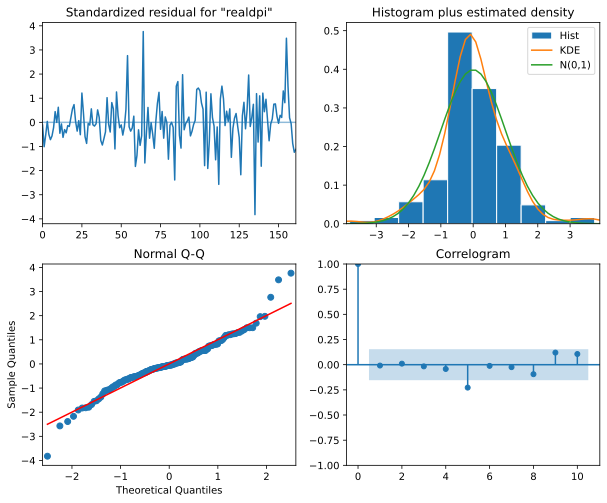

In [ ]:
### **a. residuos de realdpi**
best_model_fit.plot_diagnostics(figsize=(10,8), variable=0);

plt.savefig('figures', dpi=300)


### **Conclusión del grafico de residuos para la Serie diferenciada 1**
+ **Figura 10.4 Análisis de residuos de realdpi. Los residuos estandarizados parecen no tener tendencia y una varianza constante, lo que está en línea con el ruido blanco. El histograma también se asemeja mucho a la forma de una distribución normal. Esto se ve respaldado por el gráfico Q-Q, que muestra una línea bastante recta que se encuentra en y = x, aunque podemos ver cierta curvatura en los extremos. Finalmente, el correlograma no muestra coeficientes significativos excepto en el retardo 5. Sin embargo, es probable que esto se deba al azar, ya que no hay coeficientes significativos anteriores. Por lo tanto, podemos concluir que los residuos están cerca del ruido blanco.**

### **b. residuos de realcons.**
+ Al pasar la variable = 1 se especifica que queremos los gráficos de los residuos para **realcons**, ya que fue la segunda variable pasada en el modelo

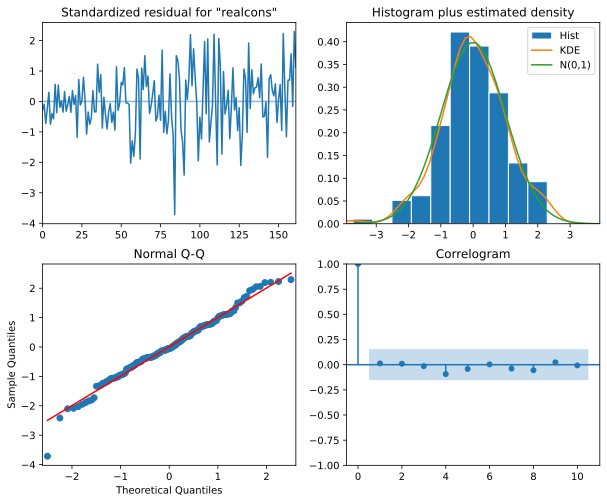

In [ ]:
### **b. residuos de realcons.**
best_model_fit.plot_diagnostics(figsize=(10,8), variable=1);

plt.savefig('figures', dpi=300)


#### **Análisis de residuos Para la Serie 2 diferenciada**
+ **Figura 10.5 Análisis de residuos de los realcons. El gráfico superior izquierdo muestra los residuos a lo largo del tiempo y se puede ver que no hay tendencia y varianza constante, lo que coincide con el comportamiento del ruido blanco. En la parte superior derecha, la distribución es muy similar a una distribución normal. Esto se ve respaldado por el gráfico Q-Q en la parte inferior izquierda, que muestra una línea bastante recta que se encuentra en y = x. Por último, el correlograma
en la parte inferior derecha muestra que no hay coeficientes de autocorrelación significativos después del retardo 0. Por lo tanto, los residuos son similares al ruido blanco.**

### **Paso 11. Prueba de independencia de los residuos- prueba de Ljung-Box**
+ Una vez realizado el análisis cualitativo, podemos pasar al análisis cuantitativo mediante la prueba de Ljung-Box.
+ **Recordemos que la hipótesis nula de la prueba de Ljung-Box establece que los residuos son independientes y no están correlacionados.**
+ Por lo tanto, para que los residuos se comporten como ruido blanco, la prueba debe devolver valores p mayores que 0,05, en cuyo caso no rechazamos la hipótesis nula.

### **a. Prueba de Ljung - Box para los residuos realdpi con el modelo $VAR(3)$**

In [ ]:
### **a. Prueba de Ljung - Box para los residuos realdpi con el modelo $VAR(3)$

from statsmodels.stats.diagnostic import acorr_ljungbox # Import the function

realdpi_residuals = best_model_fit.resid['realdpi']
acorr_ljungbox(realdpi_residuals, np.arange(1, 11, 1))


,lb_stat,lb_pvalue
1,0.011641,0.914079
2,0.029410,0.985403
3,0.075796,0.994575
4,0.378020,0.984237
5,9.142892,0.103499
6,9.165748,0.164469
7,9.270487,0.233815
8,10.812127,0.212573
9,13.318498,0.148716
10,15.287698,0.121920


#### **Análisis de la prueba Prueba de Ljung-Box para realdpi**
+ *Al ejecutar la prueba de Ljung-Box sobre los residuos de realdpi, se obtienen valores p que son todos mayores que 0,05. Por lo tanto, no rechazamos la hipótesis nula, lo que significa que los residuos no están correlacionados y son independientes, al igual que el ruido blanco.*


In [ ]:
### **b. Prueba de Ljung - Box para los residuos realcons con el modelo $VAR(3)$

from statsmodels.stats.diagnostic import acorr_ljungbox # Import the function

realcons_residuals = best_model_fit.resid['realcons']
acorr_ljungbox(realcons_residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,0.023757,0.877505
2,0.068698,0.966234
3,0.068777,0.995301
4,0.235628,0.993582
5,0.377556,0.995925
6,0.787230,0.992412
7,1.015086,0.994581
8,2.150240,0.976056
9,2.436944,0.982531
10,2.442617,0.991686



#### **Análisis de la prueba Prueba de Ljung-Box para realcons**
+ *Al ejecutar la prueba de Ljung-Box sobre los residuos de realcons, se obtienen valores p que son todos mayores que 0,05. Por lo tanto, no rechazamos la hipótesis nula, lo que significa que los residuos no están correlacionados y son independientes, al igual que el ruido blanco.*

### **Paso 12. Haga pronósticos sobre el conjunto de prueba. Utilice un método ingenuo último valor conocido y un modelo $VAR(3)$**
+ Dado que el modelo pasó tanto los aspectos cualitativos como cuantitativos del análisis residual, podemos avanzar a pronosticar de realcons y realdpi utilizando un modelo VAR(3).
+ Compararemos el modelo VAR(3) con una línea base que simplemente predice el último valor observado.
+ Realizaremos una previsión de cuatro pasos hacia el futuro, lo que equivale a pronosticar un año completo, ya que los datos se muestrean trimestralmente.
+ Por lo tanto, realizaremos una previsión continua de cuatro pasos hacia el futuro a lo largo de toda la longitud del conjunto de prueba.
+ Para ello, utilizaremos la función `rolling_forecast` que hemos definido muchas veces en los últimos capítulos.
+ Esta vez, aplicaremos algunas modificaciones leves para adaptarnos al modelo VAR(3).
+ Deberá generar predicciones tanto para *realdpi* como para *realcons*, por lo que debemos devolver dos listas que contengan pronosticos.
+ La siguiente lista muestra el código para la función rolling_forecast.

In [ ]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'VAR':

        realdpi_pred_VAR = []
        realcons_pred_VAR = []

        for i in range(train_len, total_len, window):
            model = VARMAX(df[:i], order=(3,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)

            oos_pred_realdpi = predictions.predicted_mean.iloc[-window:]['realdpi']
            oos_pred_realcons = predictions.predicted_mean.iloc[-window:]['realcons']

            realdpi_pred_VAR.extend(oos_pred_realdpi)
            realcons_pred_VAR.extend(oos_pred_realcons)

        return realdpi_pred_VAR, realcons_pred_VAR

    elif method == 'last':
        realdpi_pred_last = []
        realcons_pred_last = []

        for i in range(train_len, total_len, window):

            realdpi_last = df[:i].iloc[-1]['realdpi']
            realcons_last = df[:i].iloc[-1]['realcons']

            realdpi_pred_last.extend(realdpi_last for _ in range(window))
            realcons_pred_last.extend(realcons_last for _ in range(window))

        return realdpi_pred_last, realcons_pred_last

### **Paso 13. Conjunto de entrenamiento y de prueba**
+ Ahora podemos usar esta función para generar los pronósticos para *realdpi* y *realcons* usando el modelo *VAR(3)*.
+ La ​​ventana es 4, ya que queremos pronosticar cuatro pasos de tiempo en el futuro a la vez, lo que equivale a 1 año.

### **a. Horizonte de predicción**

In [ ]:
### **a. Horizonte de predicción**
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 4

### **b. Para usar el modelo de pronostico**
+ Recordemos que el modelo VAR(3) requiere que las series sean estacionarias, es decir, que hemos transformado los pronósticos.
+ Luego debemos integrarlos utilizando la suma acumulada para devolverlos a la escala original de los datos.

In [ ]:
realdpi_pred_VAR, realcons_pred_VAR = rolling_forecast(endog_diff, TRAIN_LEN, HORIZON, WINDOW, 'VAR')


### **c. Realizando los pronosticos con el modelo VAR**

In [ ]:
### **c. Realizando los pronosticos con el modelo VAR**
test = endog[163:]

test['realdpi_pred_VAR'] = pd.Series()
test['realdpi_pred_VAR'] = endog.iloc[162]['realdpi'] + np.cumsum(realdpi_pred_VAR)

test['realcons_pred_VAR'] = pd.Series()
test['realcons_pred_VAR'] = endog.iloc[162]['realcons'] + np.cumsum(realcons_pred_VAR)

test

,realdpi,realcons,realdpi_pred_VAR,realcons_pred_VAR
163,7887.7,7389.2,7829.224941,7354.323079
164,8053.4,7501.3,7897.190077,7430.252000
165,8135.9,7571.8,7960.564871,7496.624306
166,8222.3,7645.9,8014.757071,7556.606726
167,8234.6,7713.5,8080.701763,7630.989437
168,8296.5,7744.3,8142.391377,7692.838219
169,8273.7,7773.5,8200.122120,7753.858671
170,8484.5,7807.7,8259.360845,7812.527390
171,8385.5,7930.0,8264.384832,7864.627994
172,8611.6,7957.3,8320.857168,7895.052746


### **d. Realizando los pronosticos con el modelo Ingenuo ultimo valor**

In [ ]:
realdpi_pred_last, realcons_pred_last = rolling_forecast(endog, TRAIN_LEN, HORIZON, WINDOW, 'last')

test['realdpi_pred_last'] = realdpi_pred_last
test['realcons_pred_last'] = realcons_pred_last

test

,realdpi,realcons,realdpi_pred_VAR,realcons_pred_VAR,realdpi_pred_last,realcons_pred_last
163,7887.7,7389.2,7829.224941,7354.323079,7716.0,7199.9
164,8053.4,7501.3,7897.190077,7430.252000,7716.0,7199.9
165,8135.9,7571.8,7960.564871,7496.624306,7716.0,7199.9
166,8222.3,7645.9,8014.757071,7556.606726,7716.0,7199.9
167,8234.6,7713.5,8080.701763,7630.989437,8135.9,7571.8
168,8296.5,7744.3,8142.391377,7692.838219,8135.9,7571.8
169,8273.7,7773.5,8200.122120,7753.858671,8135.9,7571.8
170,8484.5,7807.7,8259.360845,7812.527390,8135.9,7571.8
171,8385.5,7930.0,8264.384832,7864.627994,8273.7,7773.5
172,8611.6,7957.3,8320.857168,7895.052746,8273.7,7773.5


### **Paso 14. Construya los graficos de predicción para los dos métodoss: Ingenuo, $VAR(3)$ para las dos series diferenciadas**

+ **Ahora, la prueba contiene los valores reales del conjunto de prueba, las predicciones del modelo VAR(3) y las predicciones del método de referencia. Todo está listo para que visualicemos los pronósticos y evaluemos los métodos de pronóstico utilizando el error porcentual absoluto medio (MAPE). Los pronósticos se muestran en la figura 10.6.**

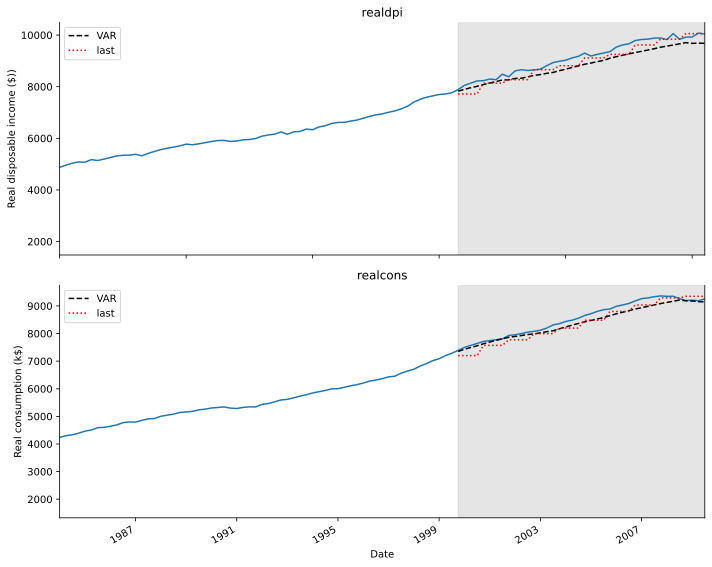

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

ax1.plot(df['realdpi'])
ax1.plot(test['realdpi_pred_VAR'], 'k--', label='VAR')
ax1.plot(test['realdpi_pred_last'], 'r:', label='last')
ax1.set_xlabel('Date')
ax1.set_ylabel('Real disposable income ($))')
ax1.set_title('realdpi')
ax1.spines['top'].set_alpha(0)
ax1.axvspan(163, 202, color='#808080', alpha=0.2)
ax1.set_xlim(100, 202)
ax1.legend(loc=2)

ax2.plot(df['realcons'])
ax2.plot(test['realcons_pred_VAR'], 'k--', label='VAR')
ax2.plot(test['realcons_pred_last'], 'r:', label='last')
ax2.set_xlabel('Date')
ax2.set_ylabel('Real consumption (k$)')
ax2.set_title('realcons')
ax2.spines['top'].set_alpha(0)
ax2.axvspan(163, 202, color='#808080', alpha=0.2)
ax2.set_xlim(100, 202)
ax2.legend(loc=2)

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))
plt.xlim(100, 202)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

+ **Figura 10.6 Pronósticos de realdpi y realcons. Puede ver que las predicciones del modelo VAR(3), que se muestran como una línea discontinua, siguen de cerca los valores reales del conjunto de prueba. También notará que la curva de puntos del método de referencia muestra pequeños pasos, lo que tiene sentido ya que estamos pronosticando un valor constante a lo largo de cuatro pasos de tiempo.**

### **Paso 15. Obtenga el Error absoluto medio (MAE) y el MAPE e interpretelo**

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_realdpi_VAR = mape(test['realdpi'], test['realdpi_pred_VAR'])
mape_realdpi_last = mape(test['realdpi'], test['realdpi_pred_last'])

mape_realcons_VAR = mape(test['realcons'], test['realcons_pred_VAR'])
mape_realcons_last = mape(test['realcons'], test['realcons_pred_last'])

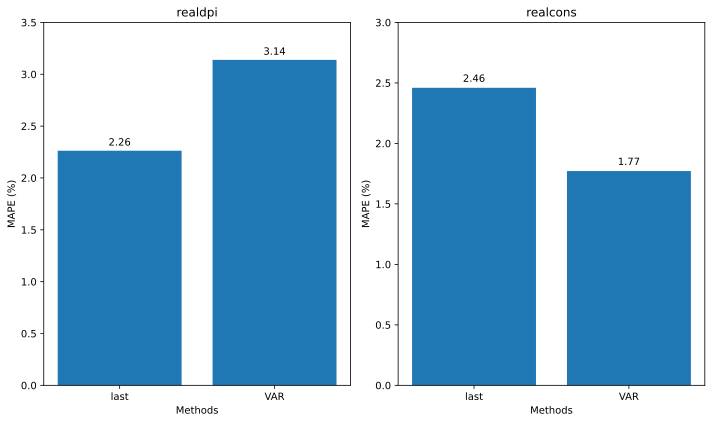

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

x = ['last', 'VAR']
y1 = [mape_realdpi_last, mape_realdpi_VAR]
y2 = [mape_realcons_last, mape_realcons_VAR]

ax1.bar(x, y1)
ax1.set_xlabel('Methods')
ax1.set_ylabel('MAPE (%)')
ax1.set_title('realdpi')
ax1.set_ylim(0, 3.5)

ax2.bar(x,y2)
ax2.set_xlabel('Methods')
ax2.set_ylabel('MAPE (%)')
ax2.set_title('realcons')
ax2.set_ylim(0, 3)

for index, value in enumerate(y1):
    ax1.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')

for index, value in enumerate(y2):
    ax2.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')

plt.tight_layout()

plt.savefig('figures', dpi=300)


+ **Figura 10.7 El MAPE del pronóstico para realdpi y realcons. Puede ver que el modelo VAR(3) tiene un peor desempeño que la línea base en el caso de realdpi. Sin embargo, el modelo VAR(3) tiene un mejor desempeño que la línea base para realcons.**.

### **Conclusiones de nuestro procedimiento**
+ En la figura 10.7 se puede ver que el modelo VAR(3) tiene un rendimiento peor que el modelo de referencia en el caso de realdpi, pero mejor que el modelo de referencia para realcons.
+ Esta es una situación ambigua. No hay un resultado claro, ya que el modelo no supera al modelo de referencia en ambas situaciones.
+ Podemos plantear la hipótesis de que en el caso de realdpi, realcons no es lo suficientemente predictivo como para hacer pronósticos más precisos que el modelo de referencia, a pesar de que la prueba de causalidad de Granger pasó.
+ Por lo tanto, deberíamos recurrir al uso de una variación del modelo SARIMAX para predecir realdpi.
+ Por lo tanto, concluiría que el modelo VAR(3) no es suficiente para
pronosticar con precisión realdpi y realcons.
+ Sugeriría utilizar dos modelos separados, que podrían incluir realdpi y realcons como variables exógenas, y también incluir potencialmente términos de promedio móvil.

# **10.4. Próximos pasos**
+ En este capítulo, cubrimos el modelo VAR(p), que nos permite pronosticar múltiples series temporales a la vez.
+ **El modelo VAR(p) significa autorregresión vectorial y supone que los valores pasados ​​de algunas series temporales predicen los valores futuros de otras series temporales.**
+ Esta relación bidireccional se prueba utilizando la prueba de causalidad de Granger.
+ Si la prueba falla, lo que significa que los valores p devueltos son mayores que 0,05, el modelo VAR(p) no es válido y no se puede utilizar.
+ Felicitaciones por llegar hasta aquí: ¡cubrimos una amplia gama de métodos estadísticos para pronosticar series temporales!
+ Estos métodos estadísticos son excelentes para conjuntos de datos más pequeños con baja dimensionalidad.
+ Sin embargo, cuando los conjuntos de datos comienzan a ser grandes, a partir de 10000 puntos de datos o más, y tienen muchas características, **el aprendizaje profundo** puede ser una gran herramienta para obtener pronósticos precisos y aprovechar todos los datos disponibles.
+ En el próximo capítulo, realizaremos un proyecto final para consolidar nuestro conocimiento de los métodos estadísticos.
+ **Luego, comenzaremos una nueva sección y aplicaremos modelos de pronóstico de aprendizaje profundo en grandes conjuntos de datos.**

# **10.5 Ejercicios**
+ Vaya más allá del modelo VAR(p) con estos ejercicios.
## **10.5.1 Use un modelo VARMA para predecir realdpi y realcons**
+ En este capítulo, usamos un modelo VAR(p). Sin embargo, usamos la función VARMAX de statsmodels para hacerlo, lo que significa que podemos extender fácilmente el modelo VAR(p) a un modelo VARMA(p,q).
+ En este ejercicio, use un modelo VARMA(p,q) para pronosticar realdpi
y realcons.
+ 1. Use los mismos conjuntos de entrenamiento y prueba que en este capítulo.
+ 2. Genere una lista de combinaciones (p,q) únicas.
+ 3. Cambie el nombre de la función optimized_VAR a optimized_VARMA y adáptela para que recorra todas las combinaciones (p,q) únicas.
+ 4. Seleccione el modelo con el AIC más bajo y realice la prueba de causalidad de Granger.
Pase en el orden más grande entre (p,q). ¿Es válido el modelo VARMA(p,q)?
+ 5. Realice el análisis de residuos.
+ 6. Haga pronósticos en una ventana de cuatro pasos sobre el conjunto de prueba. Utilice el método del último valor conocido como línea base.
+ 7. Calcule el MAPE. ¿Es inferior o superior al de nuestro modelo VAR(3)?

## **10.5.2 Use un modelo VARMAX para predecir realdpi y realcons**
+ Nuevamente, dado que usamos la función VARMAX de statsmodels, sabemos que también podemos agregar variables exógenas al modelo, al igual que en SARIMAX.
+ En este ejercicio, use el modelo VARMAX para pronosticar realdpi y realcons.
+ 1. Use los mismos conjuntos de prueba y entrenamiento que en este capítulo.
+ 2. Genere una lista de combinaciones únicas (p,q).
+ 3. Cambie el nombre de la función optimizar_VAR a optimizar_VARMAX y adáptela para que recorra todas las combinaciones únicas (p,q) y las variables exógenas.
+ 4. Seleccione el modelo con el AIC más bajo y realice la prueba de causalidad de Granger. Pase en el orden más grande entre (p,q). ¿Es válido el modelo VARMAX(p,q)?
+ 5. Realice un análisis residual.
+ 6. Haga pronósticos en una ventana de un paso sobre el conjunto de prueba. Use el método del último valor conocido como línea base.
+ 7. Calcule el MAPE. ¿El modelo funcionó mejor que la línea base?

# **Resumen del Capítulo 10**
+ El modelo de autorregresión vectorial, VAR(p), captura la relación entre múltiples series a medida que cambian con el tiempo. En este modelo, cada serie tiene un impacto en las demás.
+ Un modelo VAR(p) es válido solo si cada serie temporal causa a las demás en el sentido de Granger. Esto se determina mediante la prueba de causalidad de Granger.
+ La hipótesis nula de la prueba de causalidad de Granger establece que una serie temporal no causa a la otra en el sentido de Granger. Si el valor p es menor que 0,05, rechazamos la hipótesis nula y concluimos que la primera serie temporal causa a la otra en el sentido de Granger.